<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석(PCA, Pricipal Componenets Analysis)
>* 분산을 이용하여 분산이 가장 큰 방향의 <b>벡터</b>를 찾는다.
>* 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.
>* 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어든다.
>* 일반적으로 주성분은 원본 데이터셋의 특성 개수만큼 찾을 수 있다.
>* 원본 데이터 재구성
>* Explained Variance
>* 다른 알고리즘과 함께 사용하기

## 장점
>* 차원 축소로 저장 공간을 줄이고 시각화 하기 쉽다.
>* 다른 알고리즘의 성능을 높이고, 훈련 시간을 줄일 수 있다.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2022-09-04 13:17:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-09-04 13:17:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-09-04 13:17:07--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize = (cols * ratio, rows * ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
            axs[i, j].axis('off')
    plt.show()

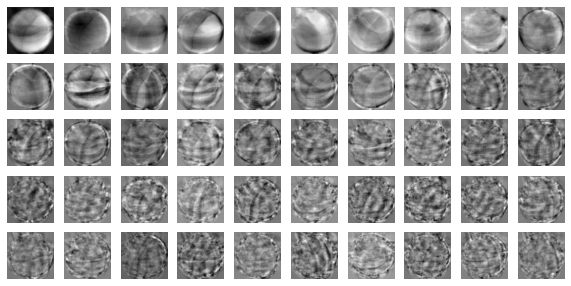

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [12]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [14]:
# 원본 데이터 재구성

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


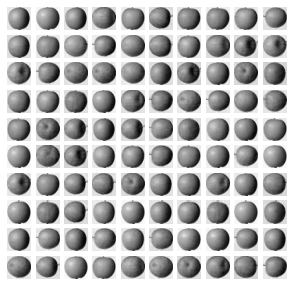

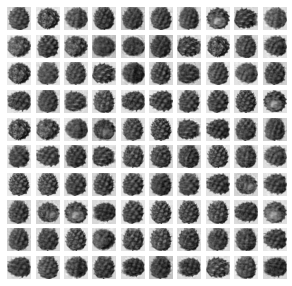

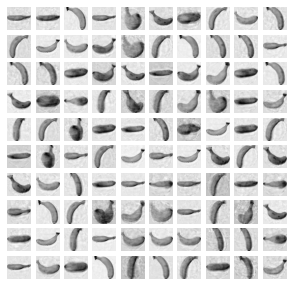

In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start + 100], ratio = 0.5)
    print('\n')

In [18]:
# Explained Variance

print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산을 유지하고 있는데 복원했을 때, 이미지의 품질이 높았던 이유를 여기서 찾을 수 있습니다.

0.9215819416684693


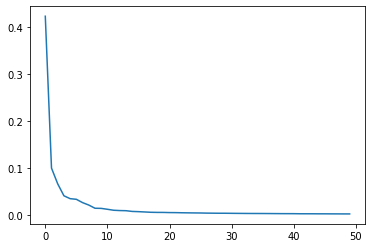

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# >> 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

In [20]:
# 축소된 데이터를 가지고서 Logistic Regression 해보기

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [22]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [23]:
# 원본 데이터를 통한 Cross Validation

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.738935375213623


In [24]:
# 차원 축소한 데이터를 통한 Cross Validation

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# >> 훈련 시간이 20배 이상 감소했으며 정확도가 100%가 되었다.

1.0
0.05411419868469238


In [25]:
# 주성분 개수의 지정이 아닌 지정된 분산의 비율까지 도달하게끔 주성분을 찾을 수 있다.
# 정수가 아닌 실수를 입력하면 된다. (0 ~ 1)

pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
# 50%까지 도달하려면 필요한 주성분의 개수는 고작 2개다.
print(pca.n_components_)

2


In [28]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [29]:
# 2개의 특성만 사용하고도 성능이 좋은지 확인

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 2개의 특성만을 사용했지만 99%의 Accuracy가 나온다.

0.99
0.03602762222290039


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [30]:
# 차원 축소된 데이터로 K-Means

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


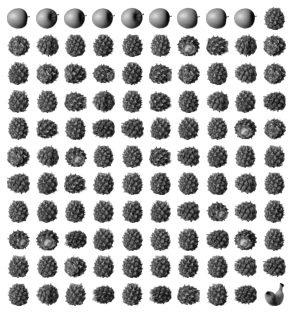

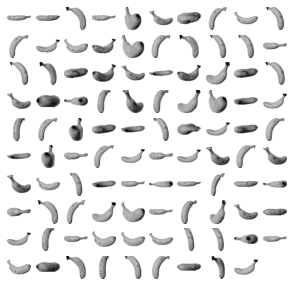

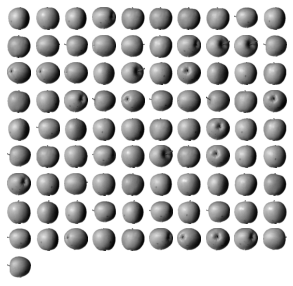

In [32]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label], ratio = 0.5)
    print('\n')

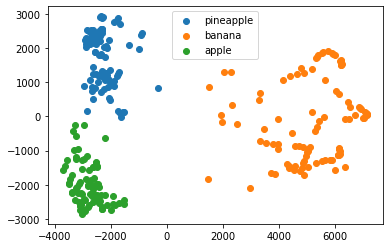

In [34]:
# 차원을 축소하게 되면(차원이 3 이하이면), '시각화'라는 장점을 얻을 수 있다.

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend(['pineapple', 'banana', 'apple'])
plt.show()